In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:\ML Project Decision Tree Airline Customer Satisfaction.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,...,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,...,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [6]:
df=df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,Unnamed: 0.1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
df.columns=[each.replace(" ","_")for each in df.columns]

In [9]:
df.columns

Index(['Unnamed:_0.1', 'id', 'Gender', 'Customer_Type', 'Age',
       'Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
df["satisfaction"]=[1 if each=="satisfied" else 0 for each in df.satisfaction]


In [11]:
df["satisfaction"].value_counts()

satisfaction
0    5689
1    4311
Name: count, dtype: int64

<Axes: xlabel='satisfaction'>

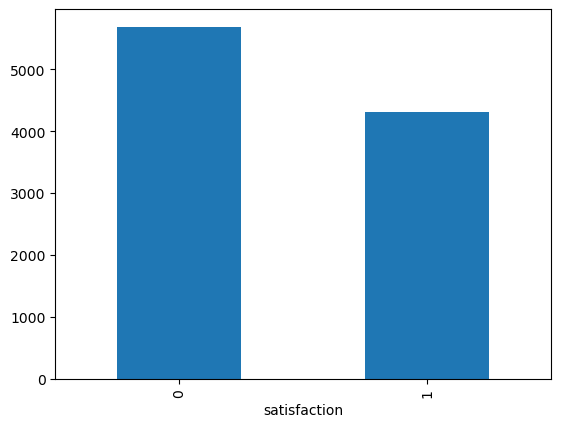

In [12]:
df["satisfaction"].value_counts().plot(kind="bar")

<Axes: xlabel='Gender'>

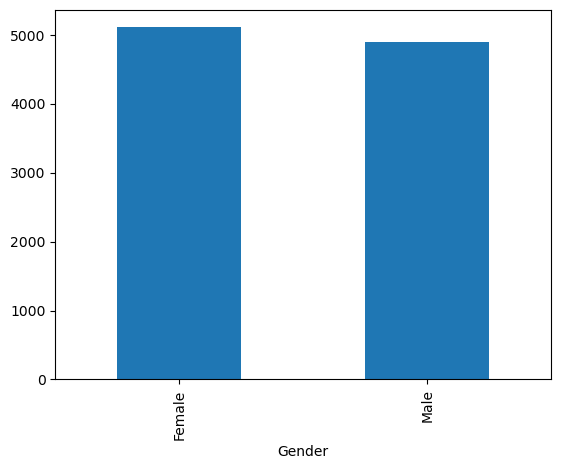

In [13]:
df["Gender"].value_counts().plot(kind="bar")

In [14]:
# Gender vs satisfaction
df[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
1,Male,0.438062
0,Female,0.424432


In [15]:
df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
71,79,0.666667
39,46,0.643192
34,41,0.632743
38,45,0.608466
66,73,0.600000
...,...,...
7,14,0.076923
0,7,0.071429
59,66,0.050000
69,76,0.000000


In [16]:
df[["Food_and_drink","satisfaction"]].groupby(["Food_and_drink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Food_and_drink,satisfaction
0,0,0.625000
5,5,0.566176
4,4,0.515050
3,3,0.404990
2,2,0.362305
1,1,0.198142


<Axes: >

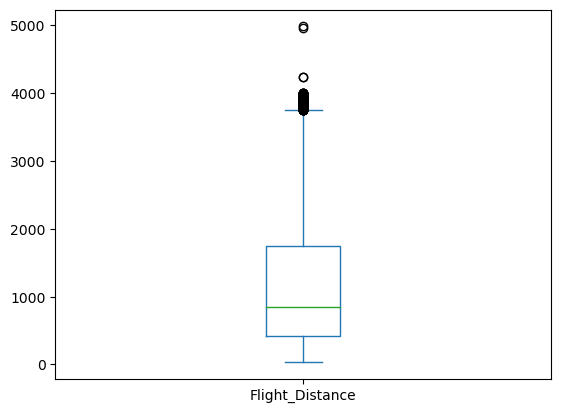

In [17]:
df["Flight_Distance"].plot(kind="box")

<Axes: >

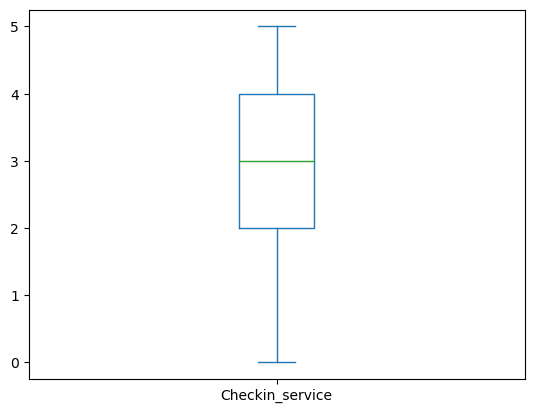

In [18]:
df["Checkin_service"].plot(kind="box")

In [19]:
df.isnull().sum()

Unnamed:_0.1                          0
id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0


In [20]:
df=df.dropna()

In [21]:
df.isnull().sum()

Unnamed:_0.1                         0
id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [22]:
df["Flight_Distance"].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
enc=LabelEncoder()

In [25]:
df['Gender'] = enc.fit_transform(df['Gender'])


In [26]:
df['Customer_Type'] = enc.fit_transform(df['Customer_Type'])
df['Type_of_Travel'] = enc.fit_transform(df['Type_of_Travel'])
df['Class'] = enc.fit_transform(df['Class'])


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed:_0.1                       9974 non-null   int64  
 1   id                                 9974 non-null   int64  
 2   Gender                             9974 non-null   int32  
 3   Customer_Type                      9974 non-null   int32  
 4   Age                                9974 non-null   int64  
 5   Type_of_Travel                     9974 non-null   int32  
 6   Class                              9974 non-null   int32  
 7   Flight_Distance                    9974 non-null   int64  
 8   Inflight_wifi_service              9974 non-null   int64  
 9   Departure/Arrival_time_convenient  9974 non-null   int64  
 10  Ease_of_Online_booking             9974 non-null   int64  
 11  Gate_location                      9974 non-null   int64  
 1

In [28]:
df = df.drop(['id','Unnamed:_0.1'],axis=1)

In [29]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [30]:
X = df.drop('satisfaction',axis=1)
y = df['satisfaction']

In [31]:
X.shape

(9974, 22)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
Scaler=StandardScaler()
X_scal=Scaler.fit_transform(X)

In [34]:
from sklearn.ensemble import RandomForestClassifier


In [35]:
model_rf = RandomForestClassifier()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X_scal,y,test_size=0.2)

In [38]:
X_test.shape

(1995, 22)

In [39]:
X_train.shape

(7979, 22)

In [40]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt",
            'min_samples_leaf':1,
             'min_samples_split':2,
            'criterion':'gini'}

model_dt = DecisionTreeClassifier(**params_dt)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [42]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("pricison_score: ",precision_score(y_test, y_pred))
    print("recall_score: ",recall_score(y_test, y_pred))
    print("Accuracy = {}".format(accuracy))
    print(classification_report(y_test,y_pred,digits=5))
    print(confusion_matrix(y_test,y_pred))

In [43]:
run_model(model_rf,X_train, y_train, X_test, y_test)

pricison_score:  0.9564164648910412
recall_score:  0.919674039580908
Accuracy = 0.9473684210526315
              precision    recall  f1-score   support

           0    0.94098   0.96831   0.95445      1136
           1    0.95642   0.91967   0.93769       859

    accuracy                        0.94737      1995
   macro avg    0.94870   0.94399   0.94607      1995
weighted avg    0.94762   0.94737   0.94723      1995

[[1100   36]
 [  69  790]]
